# The Curious Case of Cluster Headaches in a 13-Year-Old Girl

   Cluster headaches are uncommon but very severe headaches, and they occur five times more often in men than women. Although anyone can get cluster headaches, the typical patient is a middle-aged man with a history of smoking.

   The problem gets its name because the headaches tend to come in clusters, with one to eight headaches a day during a one- to three-month period every year or two, often at the same time of year. The pain always strikes one side of the head and is very severe. The eye on the painful side is red and watery, the eyelid may droop, and the nose runs or is blocked. The attack starts abruptly and lasts for 30 to 60 minutes. Most sufferers become restless and agitated during the attack; unable to sit still, they pace, jog in place, or beat their head against a wall. Nausea and sensitivity to light and sound may accompany the pain.

   CT scans, MRIs, and EEGs (brain wave tests) look normal in cluster headaches. 

        -From Harvard Health

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import pandas_profiling
from WunderWeather import weather
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import re
from json import loads 
from urllib.request import urlopen
from datetime import datetime, timedelta
import time
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, RandomTreesEmbedding, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, StandardScaler, PolynomialFeatures
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, auc, roc_curve, classification_report, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Create blank dataframe
df = pd.DataFrame()

In [3]:
# Fetch & Append Weather data to the dataframe.
data = []

def download(location, dates): 
    print(len(dates))
    df = pd.DataFrame()
    for date in dates:
        date = date.strftime("%Y%m%d")
        url = "http://api.wunderground.com/api/13a24bfa45f7f9e9/history_"+ date +"/q/"+ location +".json"
        weather = urlopen(url) 
        string = loads(weather.read())
        
        #timeout in seconds
        #time.sleep(6)
        
    # Get two surrounding the time of attack
    
        observation = string['history']['dailysummary'][0]
        #pprint(observation)
        
        data.append({
            'Date': date,
            'Location': location,
            'Temp': observation['meantempi'],
            'Pressure': observation['meanpressurei'],
            'Dewpt': observation['meandewpti'],
            'Winddir': observation['meanwdird'],
            'Windspd': observation['meanwindspdi'],
            'Rain': observation['rain'] })
        weather_df = pd.DataFrame(data)
        
        #Save to CSV files as we go:
        suffix = location +"_mtbaker"+ '.csv'
        filepath = './CH_Downloaded_data/' + suffix
        weather_df.to_csv(filepath, encoding='utf-8')
        
    return weather_df

#weather_df= download('KPHF', dates = pd.date_range('03/01/2010', periods=116, freq='D'))
#Korea after high school graduation
#weather_df= download('RKTT', dates = pd.date_range('06/25/2010', periods=60, freq='D'))
#Evanston, Illinois
#weather_df= download('KPWK', dates = pd.date_range('12/19/2010', periods=184, freq='D')) 
#Korea after freshman year
#weather_df= download('RKTT', dates = pd.date_range('06/21/2011', periods=73, freq='D'))
#Evanston, Illinois Sophomore year
#weather_df= download('KPWK', dates = pd.date_range('02/28/2012', periods=137, freq='D')) 
#Cambridge/Boston after sophomore year
#weather_df= download('KBOS', dates = pd.date_range('06/21/2012', periods=65, freq='D'))
#Back home for two weeks after Harvard before starting junior year
#weather_df= download('KPHF', dates = pd.date_range('08/25/2012', periods=16, freq='D'))
#Evanston, Illinois Junior & Senior Year and beyond.
#Lake Tahoe, California
#weather_df= download('KTVL', dates = pd.date_range('09/22/2015', periods=360, freq='D')) 
#Seattle, Washington
#weather_df= download('KBFI', dates = pd.date_range('09/16/2016', periods=500, freq='D')) 
#Maple Falls near Mt. Baker
#weather_df= download('KBLI', dates = pd.date_range('02/16/2017', periods=7, freq='D')) 
#weather_df

In [4]:
# Idea: Include elevation of the locations!

In [5]:
# Pipeline()-- Random Forest   AdaBoost   XGBoost   Neural Network:Keras 

In [6]:
df_one = pd.read_csv('./CH_Downloaded_data/AthensGA1.csv')
df_two = pd.read_csv('./CH_Downloaded_data/AthensGA2.csv')
df_3 = pd.read_csv('./CH_Downloaded_data/AnnArbor1.csv')
df_4 = pd.read_csv('./CH_Downloaded_data/AnnArbor2.csv')
df_5 = pd.read_csv('./CH_Downloaded_data/AnnArbor3.csv')
df_6 = pd.read_csv('./CH_Downloaded_data/DaeguKorea.csv')
df_7 = pd.read_csv('./CH_Downloaded_data/NewportNewsVA1.csv')
df_8 = pd.read_csv('./CH_Downloaded_data/NewportNewsVA2.csv')
df_9 = pd.read_csv('./CH_Downloaded_data/NewportNewsVA3.csv')
df_10 = pd.read_csv('./CH_Downloaded_data/RKTT_4.csv')
df_11 = pd.read_csv('./CH_Downloaded_data/KPWK_5.csv')
df_12 = pd.read_csv('./CH_Downloaded_data/KPWK_6.csv')
df_13 = pd.read_csv('./CH_Downloaded_data/RKTT_7.csv')
df_14 = pd.read_csv('./CH_Downloaded_data/KPWK_8.csv')
df_15 = pd.read_csv('./CH_Downloaded_data/KPWK_9.csv')
df_16 = pd.read_csv('./CH_Downloaded_data/KBOS_10.csv')
df_17 = pd.read_csv('./CH_Downloaded_data/KPHF_11.csv')
df_18 = pd.read_csv('./CH_Downloaded_data/KPWK_12.csv')
df_19 = pd.read_csv('./CH_Downloaded_data/KPWK_13.csv')
df_20 = pd.read_csv('./CH_Downloaded_data/KPWK_14.csv')
df_21 = pd.read_csv('./CH_Downloaded_data/KTVL_15.csv')
df_22 = pd.read_csv('./CH_Downloaded_data/KBFI_16.csv')
df_23 = pd.read_csv('./CH_Downloaded_data/KBLI_mtbaker.csv')
#df_one.head()

In [7]:
#Append the dataframes together, in numerical order
total_df = pd.concat([df_one,df_two, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, 
                          df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23], axis=0, join='outer', ignore_index=True)

#Print last five rows of dataframe
total_df.head()

,Unnamed: 0,Date,Dewpt,Location,Pressure,Rain,Temp,Winddir,Windspd
0,0,20040101,27.0,GA/Athens,30.38,0,52.0,213,2.0
1,1,20040102,41.0,GA/Athens,30.26,0,54.0,205,3.0
2,2,20040103,55.0,GA/Athens,30.19,0,59.0,206,4.0
3,3,20040104,57.0,GA/Athens,30.09,0,62.0,183,4.0
4,4,20040105,57.0,GA/Athens,29.98,1,54.0,224,11.0


In [8]:
#total_df[total_df.Date==20050101]

In [9]:
#print(total_df.Date[0])

In [10]:
#Create the very important "Attack" column in our dataframe, which will inform whether a cluster headache happened or not 
#I will fill with default '0's for now
#total_df["Attack"] = [0] * len(total_df)

#Drop the unnecessary first "Unnamed: 0" column
total_df = total_df.drop(["Unnamed: 0"], axis=1)

#Read info
total_df.info()

#Print first & last five rows of dataframe
#total_df.head()
#total_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 8 columns):
Date        5205 non-null int64
Dewpt       5202 non-null float64
Location    5205 non-null object
Pressure    5204 non-null float64
Rain        5205 non-null int64
Temp        5203 non-null float64
Winddir     5205 non-null int64
Windspd     5203 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 325.4+ KB


,Date,Dewpt,Location,Pressure,Rain,Temp,Winddir,Windspd
0,20040101,27.0,GA/Athens,30.38,0,52.0,213,2.0
1,20040102,41.0,GA/Athens,30.26,0,54.0,205,3.0
2,20040103,55.0,GA/Athens,30.19,0,59.0,206,4.0
3,20040104,57.0,GA/Athens,30.09,0,62.0,183,4.0
4,20040105,57.0,GA/Athens,29.98,1,54.0,224,11.0


,Date,Dewpt,Location,Pressure,Rain,Temp,Winddir,Windspd
5200,20170218,41.0,KBLI,29.45,1,41.0,327,1.0
5201,20170219,40.0,KBLI,29.47,1,44.0,116,12.0
5202,20170220,40.0,KBLI,29.64,1,45.0,357,5.0
5203,20170221,38.0,KBLI,29.86,1,42.0,331,3.0
5204,20170222,34.0,KBLI,30.20,1,38.0,160,3.0


There seem to be some missing or null values in our dataframe! 
  We will have to get rid of those.   Let's drop those rows entirely, because we only have so many features and we want all of our values to the features to be present.

In [11]:
#Drop any empty value rows
total_df.dropna(axis=0, how='any', inplace=True)

#Read info
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 0 to 5204
Data columns (total 8 columns):
Date        5202 non-null int64
Dewpt       5202 non-null float64
Location    5202 non-null object
Pressure    5202 non-null float64
Rain        5202 non-null int64
Temp        5202 non-null float64
Winddir     5202 non-null int64
Windspd     5202 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 365.8+ KB


 We have 5202 dates total now.  A good number to work with.

In [12]:
total_df.keys()

Index(['Date', 'Dewpt', 'Location', 'Pressure', 'Rain', 'Temp', 'Winddir',
       'Windspd'],
      dtype='object')

### Relative Humidity Calculation:
#### Unfortunately, Relative Humidity was not included in our data from the Weather Underground API scraping, since it was not available for historical weather data.  
#### I will calculate it using temperature (degree Celsius) and dew point (degree Celsius).  

#### Relative Humidity = 100*(EXP((17.625*TD)/(243.04+TD))/EXP((17.625*T)/(243.04+T))) 
#### where TD = Dew Point(degree Celsius)  and    T = Temperature(degree Celsius)


In [14]:
def calculate_humidity(TD, T):
    TD = (TD - 32) * (5/9)
    T = (T - 32) * (5/9)
    Humidity = 100*(np.exp((17.625*TD)/(243.04+TD))/np.exp((17.625*T)/(243.04+T)))
    return Humidity

# Checking to ascertain correct humidity value.
calculate_humidity(47, 79)

32.447044087492195

That's correct!

In [15]:
# List comprehension to go through the dataframe
humidity = [calculate_humidity(dewpt, temp) for dewpt, temp in zip(total_df['Dewpt'], total_df['Temp'])]

In [16]:
# Setting humidity comprehension result list to a new column in total_df called 'Humidity'
total_df['Humidity'] = humidity

In [17]:
total_df.head(25)

,Date,Dewpt,Location,Pressure,Rain,Temp,Winddir,Windspd,Humidity
0,20040101,27.0,GA/Athens,30.38,0,52.0,213,2.0,37.745294
1,20040102,41.0,GA/Athens,30.26,0,54.0,205,3.0,61.347363
2,20040103,55.0,GA/Athens,30.19,0,59.0,206,4.0,86.571132
3,20040104,57.0,GA/Athens,30.09,0,62.0,183,4.0,83.667180
4,20040105,57.0,GA/Athens,29.98,1,54.0,224,11.0,111.500283
5,20040106,23.0,GA/Athens,30.34,0,37.0,262,12.0,56.587842
6,20040107,5.0,GA/Athens,30.50,0,29.0,258,8.0,35.429101
7,20040108,15.0,GA/Athens,30.36,1,34.0,202,2.0,45.257493
8,20040109,33.0,GA/Athens,30.12,1,36.0,267,2.0,88.736701
9,20040110,29.0,GA/Athens,30.30,0,32.0,132,4.0,88.541445


In [18]:
# How many different cities was I based in the last 14 years?
total_df.Location.value_counts()

KPWK         1724
KARB          764
KPHF          695
GA/Athens     575
RKTT          513
KBFI          500
KTVL          359
KBOS           65
KBLI            7
Name: Location, dtype: int64

In [19]:
#I also want to include average elevations (in meters) of each location in my data set.  

#I will do this by making two simple functions:

def include_elevation(total_df):
    total_df['Elevation'] = [get_elevation(x) for x in total_df['Location']]

def get_elevation(x):
    if x == 'KPWK': # North Chicago, IL
        return 176.5
           
    elif x == 'KARB': # Ann Arbor, MI
        return 267
            
    elif x == 'KPHF': # Newport News, VA
        return 18.3
            
    elif x == 'GA/Athens': # Athen, GA
        return 193.85
            
    elif x == 'RKTT': # Daegu, South Korea
        return 45
            
    elif x == 'KTVL': # Lake Tahoe, CA
        return 1916.89
            
    elif x == 'KBOS': # Boston, MA
        return 43
        
    elif x == 'KBFI': # Seattle, WA
        return 64.9
        
    elif x == 'KBLI': # Maple Falls near Mt. Baker, WA
        return 160
            
    else: 
        print(x, "Uh oh, unknown location. ")
        total_df.drop[total_df[total_df['Location'] == x]] #Dropping any of the unknown locations that weasled their sneaky way into my dataframe


#Run the function.
include_elevation(total_df)

#total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 0 to 5204
Data columns (total 10 columns):
Date         5202 non-null int64
Dewpt        5202 non-null float64
Location     5202 non-null object
Pressure     5202 non-null float64
Rain         5202 non-null int64
Temp         5202 non-null float64
Winddir      5202 non-null int64
Windspd      5202 non-null float64
Humidity     5202 non-null float64
Elevation    5202 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 447.0+ KB


In [20]:
#Check the new dataframe, by elevation(of city) counts.
total_df.Elevation.value_counts()

176.50     1724
267.00      764
18.30       695
193.85      575
45.00       513
64.90       500
1916.89     359
43.00        65
160.00        7
Name: Elevation, dtype: int64

In [21]:
#Make columns denoting which Month of the year
Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec = [],[],[],[],[],[],[],[],[],[],[],[]

for x in total_df['Date']:
    Jan.append(1 if re.compile("\d{4}01\d{2}").match(str(x)) else 0)    
    Feb.append(1 if re.compile("\d{4}02\d{2}").match(str(x)) else 0)    
    Mar.append(1 if re.compile("\d{4}03\d{2}").match(str(x)) else 0)
    Apr.append(1 if re.compile("\d{4}04\d{2}").match(str(x)) else 0)    
    May.append(1 if re.compile("\d{4}05\d{2}").match(str(x)) else 0)
    Jun.append(1 if re.compile("\d{4}06\d{2}").match(str(x)) else 0)
    Jul.append(1 if re.compile("\d{4}07\d{2}").match(str(x)) else 0)
    Aug.append(1 if re.compile("\d{4}08\d{2}").match(str(x)) else 0)
    Sep.append(1 if re.compile("\d{4}09\d{2}").match(str(x)) else 0)
    Oct.append(1 if re.compile("\d{4}10\d{2}").match(str(x)) else 0)
    Nov.append(1 if re.compile("\d{4}11\d{2}").match(str(x)) else 0)
    Dec.append(1 if re.compile("\d{4}12\d{2}").match(str(x)) else 0)
        
total_df['Jan'] = Jan
total_df['Feb'] = Feb
total_df['Mar'] = Mar
total_df['Apr'] = Apr
total_df['May'] = May
total_df['Jun'] = Jun
total_df['Jul'] = Jul
total_df['Aug'] = Aug
total_df['Sep'] = Sep
total_df['Oct'] = Oct
total_df['Nov'] = Nov
total_df['Dec'] = Dec

In [22]:
# Change Date column to datetime %Y%m%d format
total_df['Date'] = [datetime.strptime(str(index), '%Y%m%d') for index in total_df['Date']]

In [23]:
# Make column denoting which Year, for convenience sake later on in visualization
total_df['Year'] = pd.DatetimeIndex(total_df['Date']).year
total_df['Month'] = pd.DatetimeIndex(total_df['Date']).month
total_df.head()

,Date,Dewpt,Location,Pressure,Rain,Temp,Winddir,Windspd,Humidity,Elevation,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Month
0,2004-01-01,27.0,GA/Athens,30.38,0,52.0,213,2.0,37.745294,193.85,1,0,0,0,0,0,0,0,0,0,0,0,2004,1
1,2004-01-02,41.0,GA/Athens,30.26,0,54.0,205,3.0,61.347363,193.85,1,0,0,0,0,0,0,0,0,0,0,0,2004,1
2,2004-01-03,55.0,GA/Athens,30.19,0,59.0,206,4.0,86.571132,193.85,1,0,0,0,0,0,0,0,0,0,0,0,2004,1
3,2004-01-04,57.0,GA/Athens,30.09,0,62.0,183,4.0,83.667180,193.85,1,0,0,0,0,0,0,0,0,0,0,0,2004,1
4,2004-01-05,57.0,GA/Athens,29.98,1,54.0,224,11.0,111.500283,193.85,1,0,0,0,0,0,0,0,0,0,0,0,2004,1


In [24]:
# total_df['Date'] = total_df['Date'].apply(lambda x: dt.datetime.strftime(x, '%Y%m%d'))
#total_df.set_index('Date')
#total_df['Date'] = pd.to_datetime(total_df['Date'], yearfirst =True)
#total_df['Date'] = datetime.strftime('%Y%m%d', '%Y-%m-%d')

In [26]:
#This handy dandy list will allow me to put in the days that I marked down in my journals as day with cluster headache
# which will feed into the above function I created to change the binary values to 1.

attack_dates = [20040501, 20040516, 20040518, 20040519, 20040521, 20040522, 20040523, 20040525, 20040528, 20040601, 20040607, 
         20040608, 20040614, 20040615, 20040616, 20040617, 20040627, 20040628, 20040629, 20040630, 20040702, 20040705, 
         20040707,
         
        20050619, 20050620, 20050621, 20050622, 20050623, 20050624, 20050625, 20050626, 20050627, 20050628,
        20050629, 20050630, 20050701, 20050702, 20050703, 20050704, 20050705, 20050706, 20050707, 20050708, 20050709, 
        20050710, 20050711, 20050721, 20050723, 20050724, 20050725, 20050727, 20050728, 20050729, 20050731, 20050801,
         
        20060519, 20060520, 20060521, 20060523, 20060524, 20060525, 20060526, 20060527, 20060528, 20060529,
        20060530, 20060602, 20060603, 20060604, 20060605, 20060728, 20060729, 20060730, 20060731, 20060803,
         
        20070624, 20070625, 20070626, 20070628, 20070629, 20070630, 20070705, 20070707, 20070722, 20070728, 20070803, 
        20070804, 20070805,
        
        20080815,20080816, 20080817, 20080818, 20080819, 20080820, 20080821, 20080822, 20080823,20080824, 20080825, 20080826,
        20080827, 20080828, 20080829, 20080830, 20080831, 20080901, 20080902, 20080903, 20080904, 20080905,
        20080906, 20080907, 20080908, 20080909, 20080910, 20080911, 20080912, 20080913,
         
        20090519, 20090520, 20090521, 20090522, 20090523, 20090524, 20090525, 20090526, 20090527, 20090528, 20090529,
        20090530,20090531, 20090601, 20090602, 20090603, 20090604, 20090605, 20090606, 20090607, 20090608, 20090609,
        20090610,20090611, 20090612, 20090613, 20090614, 20090615, 20090616, 20090617, 20090618, 20090619, 20090620,
        20090621, 20090622, 20090623, 20090624, 20090625, 20090626, 20090627, 20090628, 20090629, 20090630,
        20090701, 20090702,20090703,20090704, 20090705, 20090706, 20090707, 20090708, 20090709, 20090710, 20090711, 20090712,
        20090713, 20090714, 20090715,20090716, 20090717, 20090718, 20090719, 20090720, 20090721, 20090722, 20090723,
        20090724, 20090725, 20090726,20090727, 20090728, 20090729, 20090730, 20090731,20090801,20090802,20090803, 20090804, 
        20090805, 20090806, 20090807, 20090808, 20090809, 20090810, 20090811, 20090812, 20090813, 20090814,  
                
        20100523,20100524, 20100525, 20100526, 20100527, 20100528, 20100529, 20100531, 20100601, 20100605, 
        20100623, 20100625, 20100704, 20100705, 20100706, 
        20100707, 20100708, 20100709, 20100710,20100711, 20100712, 20100713, 20100714, 20100715, 20100716, 20100717, 20100718, 
        20100719, 20100720, 20100721,20100722, 20100723, 20100724, 20100725,20100726, 20100727, 20100728, 20100729, 20100730, 
        20100731,20100801, 20100802, 20100803, 20100804, 20100805, 20100806, 20100807, 20100808, 20100809, 20100810, 20100811, 
        20100812, 20100813, 20100814, 20100815, 20100816,
        
        20110621, 20110622, 20110623, 20110624, 20110625, 20110626, 20110627, 20110628, 20110629, 20110630,
         20110701, 20110702, 20110703, 20110704, 20110705, 20110706, 20110707, 20110708, 20110709, 20110710,
         20110711, 20110712, 20110713, 20110714, 20110715, 20110716, 20110717, 20110718, 20110719, 20110720, 20110721,
         20110722, 20110723, 20110724, 20110725,20110726, 20110727, 20110728, 20110729, 20110730, 20110731,
         20110801, 20110802, 20110803, 20110804, 20110805, 20110806, 20110807, 20110808, 20110809, 20110810, 20110811, 20110812, 
            20110813, 20110814,
         
         20120515, 20120516,  20120517, 20120518, 20120519, 20120520, 20120521, 20120522, 20120523, 20120524, 20120525, 20120526, 
        20120527, 20120528, 20120529, 20120530, 20120531, 20120601, 20120602, 20120603, 20120604, 20120605, 20120606, 20120607, 
                20120608, 20120609, 20120610,
         20120611, 20120612, 20120613, 20120614, 20120615, 20120616, 20120617, 20120618, 20120619, 20120620, 20120621, 20120622,
        20120623, 20120624, 20120625, 20120626, 20120627, 20120628, 20120629, 20120630, 20120701, 20120702, 20120703,
        20120704, 20120705, 20120706, 20120707, 20120708, 20120709, 20120710, 20120711, 20120712, 20120713, 20120714,
        20120715, 20120716, 20120717, 20120718, 20120719, 20120721, 20120722, 20120723, 20120724, 20120725, 20120726,
        20120727, 20120728, 20120729, 20120730, 20120731, 20120801, 20120802, 20120803, 20120804, 20120805, 20120806,
        20120807, 20120808, 20120809, 20120810, 20120811, 20120812, 20120813, 20120814, 20120815, 20120816, 20120817,
        20120818, 20120819, 20120820, 20120821, 20120822, 20120823, 20120824, 20120825, 20120826, 20120827, 20120828,
        20120829, 20120830, 20120831, 20120901, 20120902, 20120903, 20120904, 20120905, 20120906, 20120907, 20120908,
        20120909, 20120910, 20120911, 20120912, 20120913, 20120914, 
        
         20130520, 20130524, 20130525, 20130526, 20130527, 20130528, 20130529, 20130530, 20130531, 20130601, 20130602,
         20130603, 20130604, 20130605, 20130606, 20130607, 20130610, 20130611, 20130613, 20130614, 20130617, 20130618, 20130621, 20130623,
         
         20140716, 20140717, 20140718, 20140721, 20140722, 20140723, 20140724, 20140726, 20140727, 20140728, 20140729,
         20140730, 
         
         20160507, 20160508, 20160509, 20160510,
         
         20170217, 20170218, 20170219,20170220, 20170221, 20170222]

attack_datetimes = [datetime.strptime(str(date), '%Y%m%d') for date in attack_dates]
total_df['Attack'] = [1 if date in attack_datetimes else 0 for date in total_df['Date']]
total_df['Attack'].value_counts()

0    4664
1     538
Name: Attack, dtype: int64

In [27]:
#Drop duplicate dates. This keeps only the last duplicated dates-- a little counterintuitive, but just trust me.
total_df = total_df[~total_df.index.duplicated(keep='first')]

#Check numbers
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 0 to 5204
Data columns (total 25 columns):
Date         5202 non-null datetime64[ns]
Dewpt        5202 non-null float64
Location     5202 non-null object
Pressure     5202 non-null float64
Rain         5202 non-null int64
Temp         5202 non-null float64
Winddir      5202 non-null int64
Windspd      5202 non-null float64
Humidity     5202 non-null float64
Elevation    5202 non-null float64
Jan          5202 non-null int64
Feb          5202 non-null int64
Mar          5202 non-null int64
Apr          5202 non-null int64
May          5202 non-null int64
Jun          5202 non-null int64
Jul          5202 non-null int64
Aug          5202 non-null int64
Sep          5202 non-null int64
Oct          5202 non-null int64
Nov          5202 non-null int64
Dec          5202 non-null int64
Year         5202 non-null int64
Month        5202 non-null int64
Attack       5202 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(1

In [28]:
#Drop any empty value rows
total_df.dropna(axis=0, how='any', inplace=True)

#### Now we're down to 5202 rows!  Still respectable!

In [29]:
total_df['Attack'].value_counts()

0    4664
1     538
Name: Attack, dtype: int64

In [30]:
538/4664

0.1153516295025729

### CH days represent about 11.5% compared to CH-free days.

I'm going to save this final total_df as a CSV file.

In [31]:
total_df.to_csv('./CH_Downloaded_data/total_df_final', encoding='utf-8')

In [32]:
# Gotta convert it to dictionary in order to save it as JSON
total_dfo = total_df.copy()
total_dfo.Date = total_dfo.Date.astype('object')
#total_dfo.info()
total_dict = total_dfo.to_dict()

In [33]:
# Okay, wdf, it won't work.  
# import json

# with open('data.json', 'w') as fp:
#     json.dump(total_dict, fp)

#### Let's visualize our locations in relation to date!

#### I'm going to run a pandas_profiling report on our dataframe to further visualize my data set.

In [34]:
profile = pandas_profiling.ProfileReport(total_df)
profile

Number of variables,26
Number of observations,5202
Total Missing (%),0.0%
Total size in memory,1.0 MiB
Average record size in memory,208.0 B
Numeric,8
Categorical,1
Boolean,14
Date,1
Text (Unique),0
Rejected,2


## Visualizing the Data

Text(0,0.5,'Days of CH')

Text(0.5,1,'Days of CH Episodes Per Month')

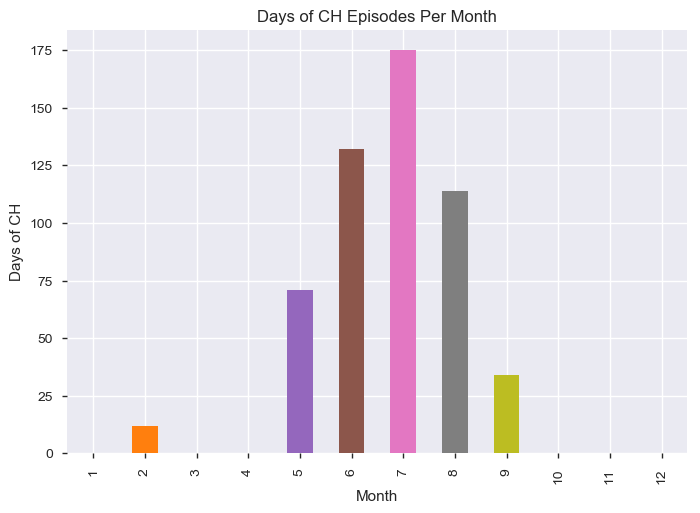

In [35]:
total_df['Attack'].groupby(total_df['Month']).sum().plot(kind='bar')
plt.ylabel('Days of CH')
plt.title('Days of CH Episodes Per Month')

Text(0,0.5,'Days of CH')

Text(0.5,1,'Days of CH Episodes per Year')

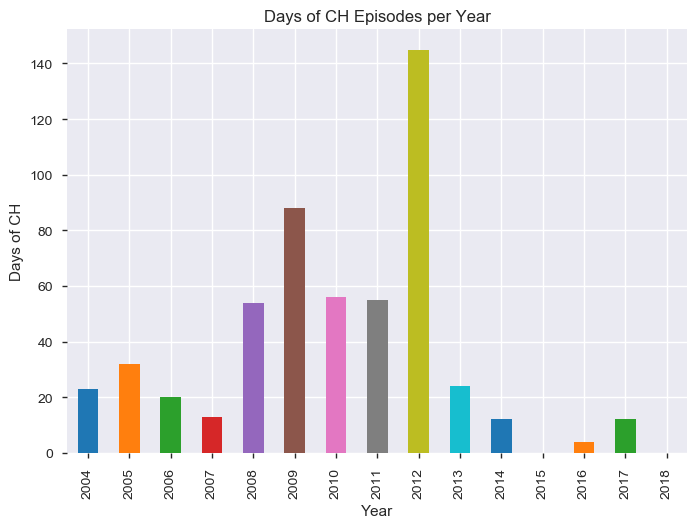

In [36]:
total_df['Attack'].groupby(total_df['Year']).sum().plot(kind='bar')
plt.ylabel('Days of CH')
plt.title('Days of CH Episodes per Year')

Text(0,0.5,'Month')

Text(0.5,1,'Month vs. Elevation')

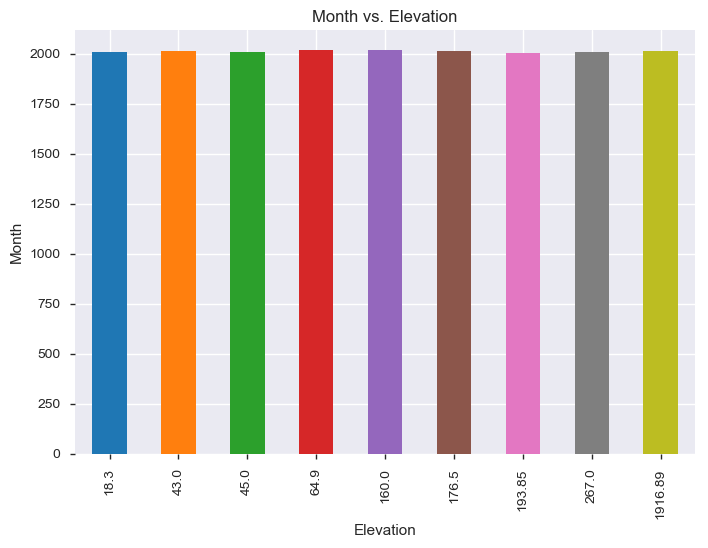

In [37]:
total_df['Year'].groupby(total_df['Elevation']).mean().plot(kind='bar')
plt.ylabel('Month')
plt.title('Month vs. Elevation')

Pressure
29.19    0.000000
29.20    0.000000
29.27    0.000000
29.28    0.000000
29.32    0.000000
29.33    0.000000
29.35    0.000000
29.36    0.000000
29.37    0.000000
29.38    0.000000
29.39    0.000000
29.40    0.000000
29.41    0.000000
29.42    0.000000
29.43    0.000000
29.44    0.333333
29.45    0.142857
29.46    0.000000
29.47    0.428571
29.48    0.000000
29.49    0.200000
29.50    0.000000
29.51    0.000000
29.52    0.200000
29.53    0.250000
29.54    0.250000
29.55    0.444444
29.56    0.000000
29.57    0.142857
29.58    0.500000
           ...   
30.39    0.000000
30.40    0.050000
30.41    0.041667
30.42    0.000000
30.43    0.066667
30.44    0.000000
30.45    0.000000
30.46    0.000000
30.47    0.000000
30.48    0.000000
30.49    0.000000
30.50    0.000000
30.51    0.000000
30.52    0.000000
30.53    0.000000
30.54    0.000000
30.55    0.000000
30.56    0.000000
30.57    0.000000
30.58    0.000000
30.59    0.000000
30.60    0.000000
30.61    0.000000
30.62    0.000000
3

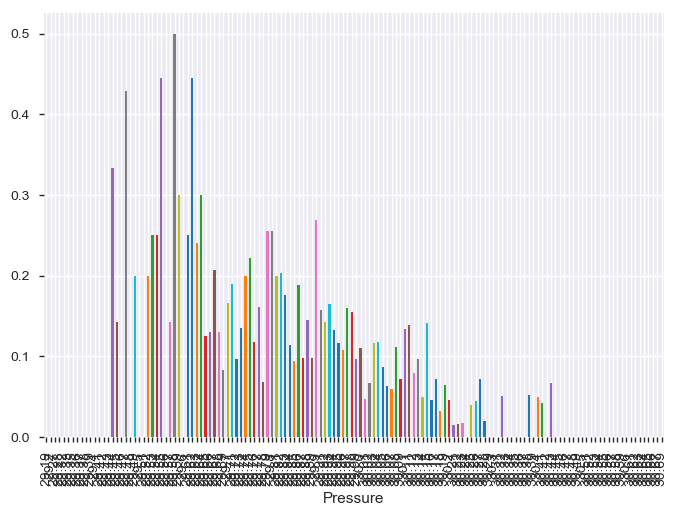

In [38]:
total_df['Attack'].groupby(total_df['Pressure']).mean()
total_df['Attack'].groupby(total_df['Pressure']).mean().plot(kind='bar')

Text(0,0.5,'Days of CH')

Text(0.5,1,'Days of CH Episodes per Elevation Location')

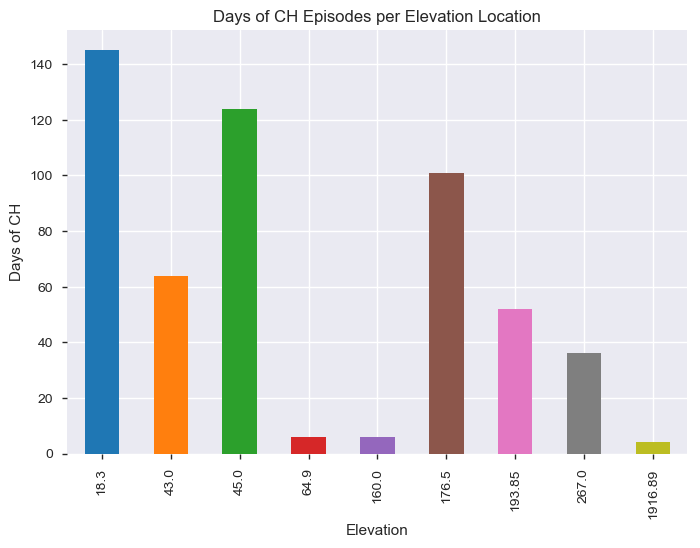

In [39]:
total_df['Attack'].groupby(total_df['Elevation']).sum().plot(kind='bar')
plt.ylabel('Days of CH')
plt.title('Days of CH Episodes per Elevation Location')

There is a curious trend here, up here.  It seems like the lower the elevation the more days of Cluster Headache I had....

Text(0,0.5,'CH Attack averages')

Text(0.5,0,'Temperature (F)')

Text(0.5,1,'CH Attack Averages per Temperature in F')

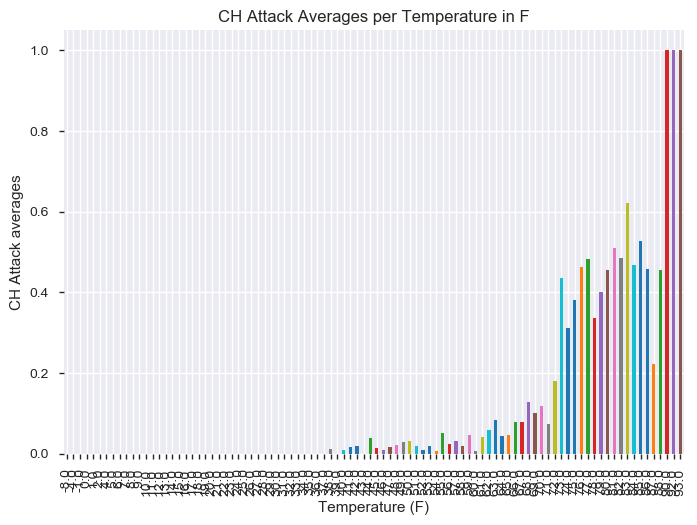

In [40]:
total_df['Attack'].groupby(total_df['Temp']).mean().plot(kind='bar')
plt.ylabel('CH Attack averages')
plt.xlabel('Temperature (F)')
plt.title('CH Attack Averages per Temperature in F')

Text(0,0.5,'CH Attack')

Text(0.5,1,'CH Attack Averages per Humidity')

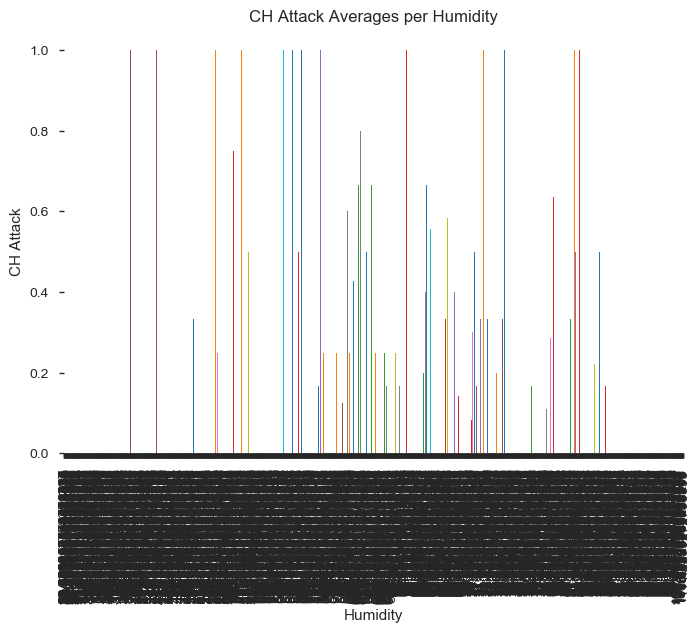

In [41]:
total_df['Attack'].groupby(total_df['Humidity']).mean().plot(kind='bar')
plt.ylabel('CH Attack')
plt.title('CH Attack Averages per Humidity')

Text(0,0.5,'CH Attack')

Text(0.5,0,'Dew Point (F)')

Text(0.5,1,'CH Attack Averages per Dew Point')

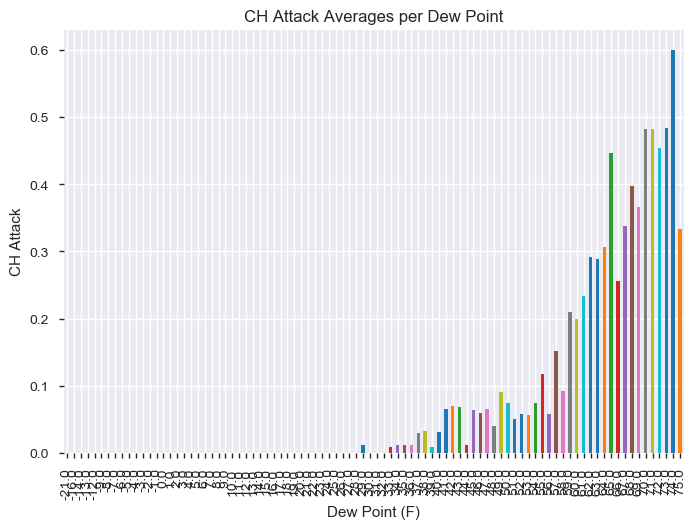

In [42]:
total_df['Attack'].groupby(total_df['Dewpt']).mean().plot(kind='bar')
plt.ylabel('CH Attack')
plt.xlabel('Dew Point (F)')
plt.title('CH Attack Averages per Dew Point')

Text(0,0.5,'CH Attack Average')

Text(0.5,1,'Cluster Headache vs. Rain')

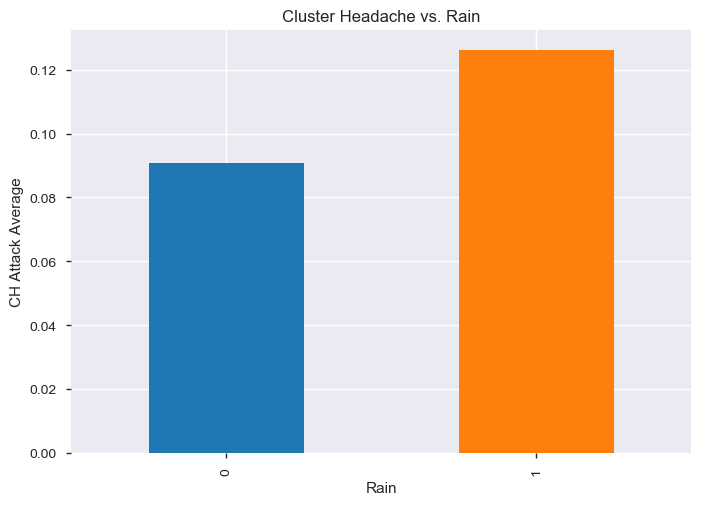

In [43]:
total_df['Attack'].groupby(total_df['Rain']).mean().plot(kind='bar')
plt.ylabel('CH Attack Average')
plt.title('Cluster Headache vs. Rain')

Text(0.5,0,'Time')

Text(0,0.5,'Elevation (meters)')

Text(0.5,1,'My Elevation/Location Over the Last 14 Years')

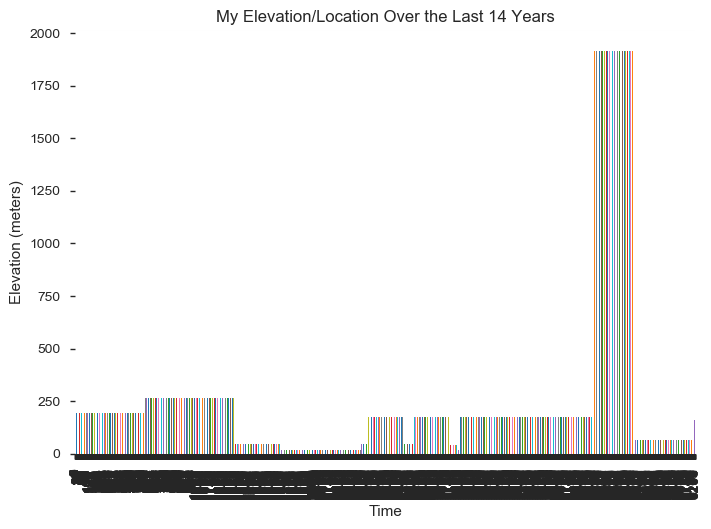

In [44]:
# Plotting Elevations(meters) over time (2004-2018) 
total_df['Elevation'].plot(kind='bar')
plt.xlabel('Time')
plt.ylabel('Elevation (meters)')
plt.title('My Elevation/Location Over the Last 14 Years')

#### I'm going to balance the sample sizes of classes, because CH days make up only 11.5% of CH-free days.

In [45]:
#Method 1: downsample majority class

df_CH = total_df[total_df['Attack']==1]
df_CH_free = total_df[total_df['Attack']==0]
 
df_CH_free_balanced = resample(df_CH_free, 
                                 replace=False,    # sample without replacement
                                 n_samples=538,     # number of CH dates
                                 random_state=411)
 
#Concat minority class with downsampled majority class
df_downsamp = pd.concat([df_CH_free_balanced, df_CH])
 
# Display new class counts
df_downsamp['Attack'].value_counts()

1    538
0    538
Name: Attack, dtype: int64

In [46]:
df_downsamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076 entries, 2893 to 5204
Data columns (total 25 columns):
Date         1076 non-null datetime64[ns]
Dewpt        1076 non-null float64
Location     1076 non-null object
Pressure     1076 non-null float64
Rain         1076 non-null int64
Temp         1076 non-null float64
Winddir      1076 non-null int64
Windspd      1076 non-null float64
Humidity     1076 non-null float64
Elevation    1076 non-null float64
Jan          1076 non-null int64
Feb          1076 non-null int64
Mar          1076 non-null int64
Apr          1076 non-null int64
May          1076 non-null int64
Jun          1076 non-null int64
Jul          1076 non-null int64
Aug          1076 non-null int64
Sep          1076 non-null int64
Oct          1076 non-null int64
Nov          1076 non-null int64
Dec          1076 non-null int64
Year         1076 non-null int64
Month        1076 non-null int64
Attack       1076 non-null int64
dtypes: datetime64[ns](1), float64(6), int6

#### Downsamping did not work well, so we're going to try upsampling the CH days

In [47]:
#Method 2: Upsample minority class

df_CH = total_df[total_df['Attack']==1]
df_no_CH = total_df[total_df['Attack']==0]
 
df_CH_upsamp = resample(df_CH, 
                                 replace=True,    # sample with replacement
                                 n_samples=4664,     # number of CH dates
                                 random_state=41)    # Because life is always a little bit shy of having the answer to everything.
 
#Concat minority class with downsampled majority class
df_upsample = pd.concat([df_CH_upsamp, df_no_CH])
 
# Display new class counts
df_upsample['Attack'].value_counts()

1    4664
0    4664
Name: Attack, dtype: int64

In [48]:
df_upsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9328 entries, 1277 to 5198
Data columns (total 25 columns):
Date         9328 non-null datetime64[ns]
Dewpt        9328 non-null float64
Location     9328 non-null object
Pressure     9328 non-null float64
Rain         9328 non-null int64
Temp         9328 non-null float64
Winddir      9328 non-null int64
Windspd      9328 non-null float64
Humidity     9328 non-null float64
Elevation    9328 non-null float64
Jan          9328 non-null int64
Feb          9328 non-null int64
Mar          9328 non-null int64
Apr          9328 non-null int64
May          9328 non-null int64
Jun          9328 non-null int64
Jul          9328 non-null int64
Aug          9328 non-null int64
Sep          9328 non-null int64
Oct          9328 non-null int64
Nov          9328 non-null int64
Dec          9328 non-null int64
Year         9328 non-null int64
Month        9328 non-null int64
Attack       9328 non-null int64
dtypes: datetime64[ns](1), float64(6), int6

## Models

In [49]:
# Pipeline()-- KNN Classifier+    Logistic Reg    Random Forest+    XGBoost     Neural Network in Keras 

In [50]:
y = total_df['Attack']
X = total_df.drop(['Attack', 'Location', 'Date'], axis=1)

In [51]:
y_1 = df_upsample['Attack']
X_1 = df_upsample.drop(['Attack', 'Date','Location'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=41)


In [52]:
from sklearn.metrics import confusion_matrix

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    # Fit the model:
    model.fit(X_train, y_train)
    
    # Predict with the model:
    y_pred = model.predict(X_test)
    
    # Generate a confusion matrix:
    CM = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    # Assign true negatives, true positives, false negatives, and false positives:
    TN = CM[0][0]
    TP = CM[1][1]
    FN = CM[1][0]
    FP = CM[0][1]
    
    # Calculate metrics:
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    # Reuturn a list:
    return( [CM, accuracy, sensitivity, specificity])


#### KNearestNeighbors Classifier

In [53]:
np.isnan(X_train).count()

Dewpt        7462
Pressure     7462
Rain         7462
Temp         7462
Winddir      7462
Windspd      7462
Humidity     7462
Elevation    7462
Jan          7462
Feb          7462
Mar          7462
Apr          7462
May          7462
Jun          7462
Jul          7462
Aug          7462
Sep          7462
Oct          7462
Nov          7462
Dec          7462
Year         7462
Month        7462
dtype: int64

In [54]:
np.any(np.isnan(X_train))

np.all(np.isfinite(X_train))

False

True

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing a k-NN model with the default parameters:

knn = KNeighborsClassifier(n_neighbors = 10)

CM, accuracy, sensitivity, specificity = evaluate_model(knn, X_train, X_test, y_train, y_test)

print("Confusion matrix:")
print(CM)
print("Accuracy Score:")
print(accuracy)
print("Sensitivity Score:")
print(sensitivity)
print("Specificity Score:")
print(specificity)

Confusion matrix:
[[767 162]
 [ 33 904]]
Accuracy Score:
0.8954983922829582
Sensitivity Score:
0.9647812166488794
Specificity Score:
0.8256189451022605


array([0. , 0. , 0. , ..., 0. , 0.4, 0. ])

0.9602210522325219

(0.0, 1)

(0.0, 1)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'KNN Classifier ROC Curve')

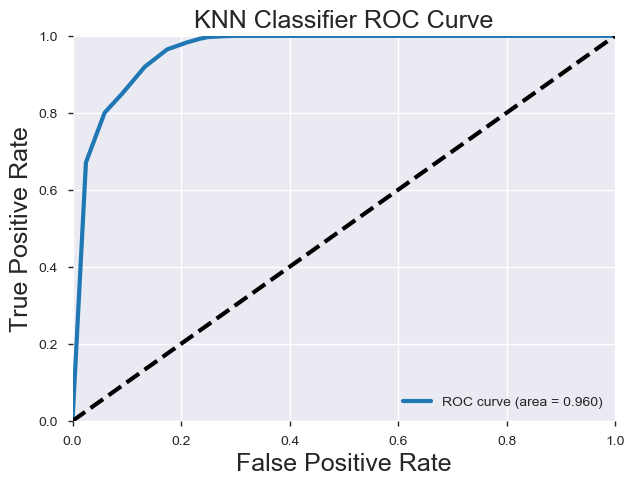

In [56]:
# AUC score = the probablity that will be correctly identified in the class its assigned

model_y_score = knn.predict_proba(X_test)[:, 1]    # [:,1] formats the output
model_y_score

roc_auc_score(y_test, model_y_score)

# Visualization of area under the curve (blue line).  Shows the 90% coverage
clf_FPR = dict()
clf_TPR = dict()
clf_ROC_AUC = dict()
clf_FPR[1], clf_TPR[1], _ = roc_curve(y_test, model_y_score)
clf_ROC_AUC[1] = auc(clf_FPR[1], clf_TPR[1])
plt.figure(figsize=[7,5])
plt.plot(clf_FPR[1], clf_TPR[1], label='ROC curve (area = %0.3f)' % clf_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('KNN Classifier ROC Curve', fontsize=18)
plt.legend(loc="lower right")

#### Logistic Regression

In [57]:
logreg = LogisticRegression()

CM, accuracy, sensitivity, specificity = evaluate_model(logreg, X_train, X_test, y_train, y_test)

print("Confusion matrix=", CM)

print("Accuracy Score=", accuracy)

print("Sensitivity Score=", sensitivity)

print("Specificity Score=", specificity)


Confusion matrix= [[712 217]
 [ 57 880]]
Accuracy Score= 0.8531618435155413
Sensitivity Score= 0.9391675560298826
Specificity Score= 0.7664155005382132


array([0.00134333, 0.0159274 , 0.00555832, ..., 0.34162471, 0.00901523,
       0.00227012])

0.9210130584176649

(0.0, 1)

(0.0, 1)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Logistic Regression Model ROC Curve')

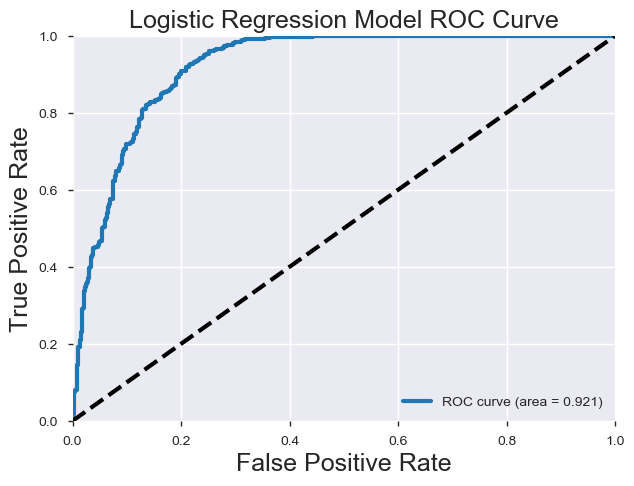

In [58]:
# AUC score = the probablity that will be correctly identified in the class its assigned

model_y_score = logreg.predict_proba(X_test)[:, 1]    # [:,1] formats the output
model_y_score

roc_auc_score(y_test, model_y_score)

# Visualization of area under the curve (blue line).  Shows the 90% coverage
clf_FPR = dict()
clf_TPR = dict()
clf_ROC_AUC = dict()
clf_FPR[1], clf_TPR[1], _ = roc_curve(y_test, model_y_score)
clf_ROC_AUC[1] = auc(clf_FPR[1], clf_TPR[1])
plt.figure(figsize=[7,5])
plt.plot(clf_FPR[1], clf_TPR[1], label='ROC curve (area = %0.3f)' % clf_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Logistic Regression Model ROC Curve', fontsize=18)
plt.legend(loc="lower right")

#### Random Forest

In [59]:
#rf_parameters = {'n_estimators': [3,4,5,6,7,8,9,10, 20, 30, 40, 50, 70, 100, 150, 200], 'criterion':['gini', 'entropy'], 'class_weight':['balanced'], 'max_depth':[None]}
# Achieved n_estimators = 20 from this.  So now will try n_estimators around 20.

rf_parameters = {'n_estimators': [6,7,8,9,10, 15, 16, 17, 18, 19,20, 21, 22, 23, 24, 25], 'criterion':['gini', 'entropy'], 'class_weight':['balanced'], 'max_depth':[None]}
rf_gridsearcher = GridSearchCV(RandomForestClassifier(), rf_parameters)
rf_gridsearcher.fit(X_train, y_train)

rf_gridsearcher.best_estimator_
best_rf = rf_gridsearcher.best_estimator_
best_rf.score(X_test, y_test)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced'], 'max_depth': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

0.9871382636655949

In [77]:
CM, accuracy, sensitivity, specificity = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Confusion matrix=", CM)

print("Accuracy Score=", accuracy)

print("Sensitivity Score=", sensitivity)

print("Specificity Score=", specificity)

Confusion matrix= [[937   0]
 [ 30 899]]
Accuracy Score= 0.9839228295819936
Sensitivity Score= 0.9677072120559742
Specificity Score= 1.0


In [60]:
clf_feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
clf_feature_importances.head(20)
clf_feature_importances.head(20).sum()

,importance
Month,0.177111
Temp,0.156946
Dewpt,0.148252
Year,0.119343
Elevation,0.087130
Humidity,0.053914
Pressure,0.050802
Winddir,0.045997
Windspd,0.030967
Jun,0.023404


importance    0.992291
dtype: float64

array([0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.95])

0.999985055188201

(0.0, 1)

(0.0, 1)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Random Forest Classifier ROC Curve')

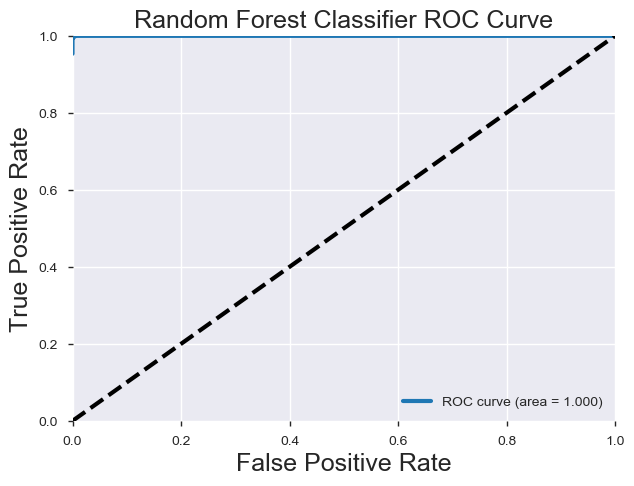

In [61]:
# AUC score = the probablity that will be correctly identified in the class its assigned

model_y_score = best_rf.predict_proba(X)[:, 1]    # [:,1] formats the output
model_y_score

roc_auc_score(y, model_y_score)

# Visualization of area under the curve (blue line).  Shows the 90% coverage
clf_FPR = dict()
clf_TPR = dict()
clf_ROC_AUC = dict()
clf_FPR[1], clf_TPR[1], _ = roc_curve(y, model_y_score)
clf_ROC_AUC[1] = auc(clf_FPR[1], clf_TPR[1])
plt.figure(figsize=[7,5])
plt.plot(clf_FPR[1], clf_TPR[1], label='ROC curve (area = %0.3f)' % clf_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve', fontsize=18)
plt.legend(loc="lower right")

In [62]:
best_rf.predict(X)

array([0, 0, 0, ..., 1, 1, 1])

#### n_estimators = 2 seems to do the trick!

In [63]:
RF_pred = best_rf.predict(X)
RF_pred

RF_pred_proba = best_rf.predict_proba(X)
RF_pred_proba

new_RF_pred = []
for i in RF_pred_proba[:,1]:
    if i > .70:
        new_RF_pred.append(1)
    else:
        new_RF_pred.append(0)

Prediction_df = pd.DataFrame(new_RF_pred)

Prediction_df

array([0, 0, 0, ..., 1, 1, 1])

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.05, 0.95]])

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
Prediction_df[0].value_counts()

0    4658
1     544
Name: 0, dtype: int64

In [65]:
pca = PCA(n_components=20)
train_features = pca.fit_transform(df_upsample.drop(['Location', 'Date'], axis=1))

rfr = RandomForestClassifier(n_estimators = 10, n_jobs = 1, 
                                         random_state = 42, verbose = 1,
                                         class_weight='balanced', criterion='entropy')
rfr.fit(X_train, y_train)

#test_features = pca.transform(XX)
# RF_pred_pca = rfr.predict(XX)
# RF_pred_pca
RF_pred_proba_pca = rfr.predict_proba(X)
RF_pred_proba_pca

new_RF_pred = []
for i in RF_pred_proba_pca[:,1]:
    if i > .70:
        new_RF_pred.append(1)
    else:
        new_RF_pred.append(0)

Prediction_df = pd.DataFrame(new_RF_pred)

Prediction_df.info()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=1, warm_start=False)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 1 columns):
0    5202 non-null int64
dtypes: int64(1)
memory usage: 40.7 KB


In [66]:
Prediction_df[0].value_counts()

0    4658
1     544
Name: 0, dtype: int64

#### Prediction values with PCA is very similar to one without PCA.

#### XG Boost

In [67]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [68]:
xgb.predict(X)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 1, 1, 0])

array([0.00109647, 0.02784354, 0.02086568, ..., 0.86030346, 0.78751564,
       0.46419346], dtype=float32)

0.9790268496496138

(0.0, 1)

(0.0, 1)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'XGBoost ROC Curve')

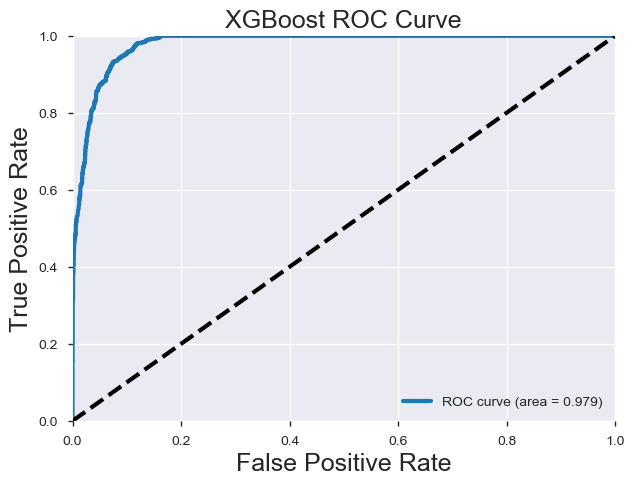

In [78]:
# AUC score = the probablity that will be correctly identified in the class its assigned

model_y_score = xgb.predict_proba(X)[:, 1]    # [:,1] formats the output
model_y_score

roc_auc_score(y, model_y_score)

# Visualization of area under the curve (blue line).  Shows the 90% coverage
clf_FPR = dict()
clf_TPR = dict()
clf_ROC_AUC = dict()
clf_FPR[1], clf_TPR[1], _ = roc_curve(y, model_y_score)
clf_ROC_AUC[1] = auc(clf_FPR[1], clf_TPR[1])
plt.figure(figsize=[7,5])
plt.plot(clf_FPR[1], clf_TPR[1], label='ROC curve (area = %0.3f)' % clf_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('XGBoost ROC Curve', fontsize=18)
plt.legend(loc="lower right")

#### Neural Networks with Keras

One of the major advantages of Neural Networks: You don’t need to worry about feature engineering. The hidden layer of a neural network will learn features for you.



In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [71]:
model = Sequential()

input_units = X_train.shape[1]
hidden_units = input_units

model.add(Dense(hidden_units, input_dim=input_units, activation='relu'))
model.add(Dense(1))


adam = Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=None)

Train on 7462 samples, validate on 1866 samples
Epoch 1/10
7462/7462 [==============================] - 1s 185us/step - loss: 6112.2446 - val_loss: 39.3330
Epoch 2/10
7462/7462 [==============================] - 0s 67us/step - loss: 20.0135 - val_loss: 8.6254
Epoch 3/10
7462/7462 [==============================] - 0s 58us/step - loss: 4.5364 - val_loss: 1.9751
Epoch 4/10
7462/7462 [==============================] - 0s 57us/step - loss: 1.4043 - val_loss: 0.8834
Epoch 5/10
7462/7462 [==============================] - 0s 62us/step - loss: 0.8438 - val_loss: 0.6073
Epoch 6/10
7462/7462 [==============================] - 0s 59us/step - loss: 0.6035 - val_loss: 0.4355
Epoch 7/10
7462/7462 [==============================] - 0s 64us/step - loss: 0.4693 - val_loss: 0.5402
Epoch 8/10
7462/7462 [==============================] - 0s 58us/step - loss: 0.4069 - val_loss: 0.2994
Epoch 9/10
7462/7462 [==============================] - 0s 59us/step - loss: 0.3638 - val_loss: 0.3128
Epoch 10/10
7462/74

In [72]:
model.predict(X_test)

array([[ 0.23461014],
       [-0.14487594],
       [-0.11541886],
       ...,
       [ 0.45290238],
       [-0.04017014],
       [ 0.30580765]], dtype=float32)

(7462, 22)

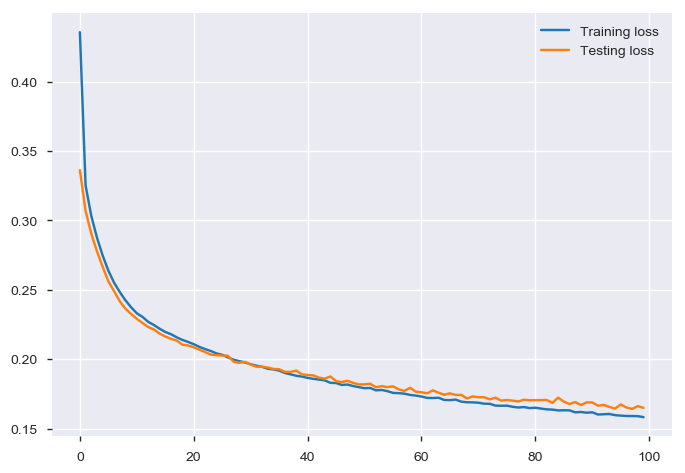

In [73]:
# Binary Classification with Keras!

y_train = y_train*-1 + 1
y_test = y_test*-1 + 1

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape

model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
              epochs=100, batch_size=None, verbose=0)


train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [74]:
model.predict(X)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

0.5

(0.0, 1)

(0.0, 1)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Neural Network (Keras) ROC Curve')

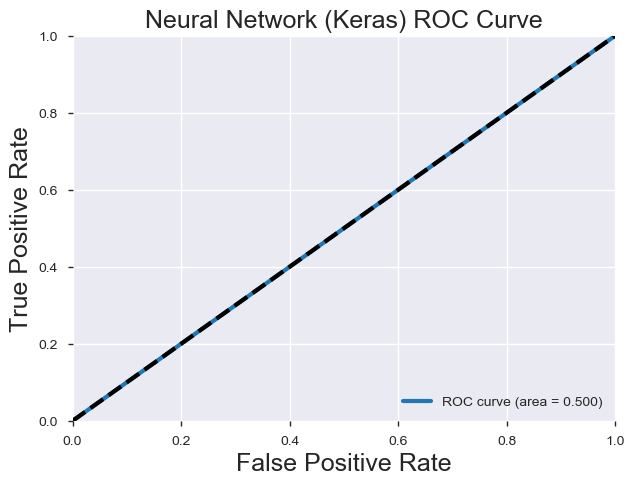

In [75]:
# AUC score = the probablity that will be correctly identified in the class it's assigned.

model_y_score = model.predict(X)    # [:,1] formats the output
model_y_score

roc_auc_score(y, model_y_score)

# Visualization of area under the curve (blue line).  Shows the 90% coverage
clf_FPR = dict()
clf_TPR = dict()
clf_ROC_AUC = dict()
clf_FPR[1], clf_TPR[1], _ = roc_curve(y, model_y_score)
clf_ROC_AUC[1] = auc(clf_FPR[1], clf_TPR[1])
plt.figure(figsize=[7,5])
plt.plot(clf_FPR[1], clf_TPR[1], label='ROC curve (area = %0.3f)' % clf_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Neural Network (Keras) ROC Curve', fontsize=18)
plt.legend(loc="lower right")

Well, that's really bad.
Alrighty, then.
So no neural network for Harmony.
That's probably for the better anyway.

## Now, I can insert future weather data into my model. 
best_rf.predict( X_forecast ) 


API scraping code

In [76]:
#   For future, if I travel or move to a new city.
# d = {'api_key': 'ad8ef392afe1e78f',
#      'state_code': 'IL',
#      'personal_weather_station': 'pws:KILMORRI2'}


f = "http://api.wunderground.com/api/13a24bfa45f7f9e9/forecast10day/q/WA/pws:KWASEATT187.json"

weather = urlopen(f) 
p = loads(weather.read())

forecast_day = p['forecast']['txt_forecast']['forecastday']

print ("\n\033[1;36mWeather Forecast: 10-Day\033[0;0m (Weather Underground)")
print ("Time: %s\n" % (p['forecast']['txt_forecast']['date']))

forecast = []
for i in range(len(forecast_day)):
    forecast.append(forecast_day[i]['title'])
    forecast.append(forecast_day[i]['fcttext'])
    forecast.append(forecast_day[i]['pop'])

forecast_df = pd.DataFrame(forecast)


    #Save to CSV files as we go:
suffix = "Forecast" + '.csv'
filepath = './CH_Downloaded_data/' + suffix
forecast_df.to_csv(filepath, encoding='utf-8')



Weather Forecast: 10-Day (Weather Underground)
Time: 7:29 PM PDT



## With my statistical expertise, I should get fairly accurate probabilities of whether or not I will have a CH episode  for the forecasted days.  But... we can never know the future for certain.  

## For once, the thought of getting a cluster headache in my future is  exciting  *and*  terrifying at the same time. :)